In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [3]:
plt.rcParams['font.family'] = 'sans-serif'  # Change to your desired font
plt.rcParams['font.size'] = 11  # Change to your desired fontsize


In [4]:
# reading dataset 

df = pd.read_excel("E:/E-JUST/publication/Exp_speed/halo_data1/Halo_train_data.xlsx", sheet_name = 'Sheet1')
df.head(5)


,Vp,Vsw,AW,Vlat,Vblk,Vfrt
0,2177,374,360,2417,1430,1291
1,300,380,165,106,131,103
2,900,293,360,1009,535,325
3,1610,370,360,584,793,610
4,371,336,158,266,268,103


In [5]:
# observing correlation between variables

df.corr()

,Vp,Vsw,AW,Vlat,Vblk,Vfrt
Vp,1.000000,0.279066,0.483240,0.820830,0.857490,0.884720
Vsw,0.279066,1.000000,0.292855,0.429719,0.120899,0.292198
AW,0.483240,0.292855,1.000000,0.474295,0.383352,0.461349
Vlat,0.820830,0.429719,0.474295,1.000000,0.635179,0.849667
Vblk,0.857490,0.120899,0.383352,0.635179,1.000000,0.797693
Vfrt,0.884720,0.292198,0.461349,0.849667,0.797693,1.000000


In [6]:
## fit a OLS model with intercept on Vp and Vlat

X, y = df[['Vlat']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Vp   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     167.3
Date:                Sun, 05 May 2024   Prob (F-statistic):           2.13e-21
Time:                        15:32:57   Log-Likelihood:                -574.44
No. Observations:                  83   AIC:                             1153.
Df Residuals:                      81   BIC:                             1158.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        336.5790     46.008      7.316      0.000     245.037     428.121
Vlat           0.5655      0.044     12.934      0.000       0.478       0.652
==============================================================================
Omnibus:                       23.304   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.787
Skew:                           1.214   Prob(JB):                     4.60e-08
Kurtosis:                       4.969   Cond. No.                     1.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
## fit a OLS model with intercept on Vp and Vblk

X, y = df[['Vblk']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Vp   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     225.0
Date:                Sun, 05 May 2024   Prob (F-statistic):           4.30e-25
Time:                        15:32:57   Log-Likelihood:                -565.77
No. Observations:                  83   AIC:                             1136.
Df Residuals:                      81   BIC:                             1140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        131.9054     51.796      2.547      0.013      28.847     234.963
Vblk           1.5547      0.104     15.000      0.000       1.348       1.761
==============================================================================
Omnibus:                        5.004   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                4.856
Skew:                           0.347   Prob(JB):                       0.0882
Kurtosis:                       3.961   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
## fit a OLS model with intercept on Vp and Vfrt 

X, y = df[['Vfrt']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Vp   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     291.8
Date:                Sun, 05 May 2024   Prob (F-statistic):           1.40e-28
Time:                        15:32:57   Log-Likelihood:                -557.57
No. Observations:                  83   AIC:                             1119.
Df Residuals:                      81   BIC:                             1124.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        208.0644     41.967      4.958      0.000     124.562     291.566
Vfrt           1.5443      0.090     17.082      0.000       1.364       1.724
==============================================================================
Omnibus:                       19.318   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.314
Skew:                           1.037   Prob(JB):                     1.93e-06
Kurtosis:                       4.818   Cond. No.                         876.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# fit a OLS model with intercept on Vp and AW 

X, y = df[['AW']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Vp   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     24.68
Date:                Sun, 05 May 2024   Prob (F-statistic):           3.70e-06
Time:                        15:32:57   Log-Likelihood:                -609.89
No. Observations:                  83   AIC:                             1224.
Df Residuals:                      81   BIC:                             1229.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.1932    147.916      0.752      0.454    -183.113     405.500
AW             2.3862      0.480      4.968      0.000       1.430       3.342
==============================================================================
Omnibus:                        2.451   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.294   Jarque-Bera (JB):                1.852
Skew:                           0.347   Prob(JB):                        0.396
Kurtosis:                       3.234   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
## fit a OLS model with intercept on Vp and Vsw

X, y = df[['Vsw']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Vp   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     6.841
Date:                Sun, 05 May 2024   Prob (F-statistic):             0.0106
Time:                        15:32:57   Log-Likelihood:                -617.56
No. Observations:                  83   AIC:                             1239.
Df Residuals:                      81   BIC:                             1244.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        346.0672    185.458      1.866      0.066     -22.936     715.071
Vsw            0.9663      0.369      2.616      0.011       0.231       1.701
==============================================================================
Omnibus:                        9.246   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                8.996
Skew:                           0.766   Prob(JB):                       0.0111
Kurtosis:                       3.505   Cond. No.                     2.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# multiple regression analysis for lateral_exp, front_exp and propagation speed

X, y = df[['Vlat', 'Vfrt']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Vp   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     159.9
Date:                Sun, 05 May 2024   Prob (F-statistic):           1.12e-28
Time:                        15:32:57   Log-Likelihood:                -554.15
No. Observations:                  83   AIC:                             1114.
Df Residuals:                      80   BIC:                             1122.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        208.0029     40.525      5.133      0.000     127.355     288.651
Vlat           0.1712      0.065      2.621      0.010       0.041       0.301
Vfrt           1.1756      0.166      7.102      0.000       0.846       1.505
==============================================================================
Omnibus:                       23.096   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.343
Skew:                           1.205   Prob(JB):                     5.75e-08
Kurtosis:                       4.957   Cond. No.                     2.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# multiple regression analysis for lateral_exp, bulk_exp and propagation speed

X, y = df[['Vlat', 'Vblk']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Vp   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     252.3
Date:                Sun, 05 May 2024   Prob (F-statistic):           2.82e-35
Time:                        15:32:57   Log-Likelihood:                -538.39
No. Observations:                  83   AIC:                             1083.
Df Residuals:                      80   BIC:                             1090.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.0813     37.704      2.548      0.013      21.049     171.114
Vlat           0.3189      0.037      8.645      0.000       0.246       0.392
Vblk           1.0216      0.097     10.521      0.000       0.828       1.215
==============================================================================
Omnibus:                       26.406   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.999
Skew:                           1.210   Prob(JB):                     3.78e-11
Kurtosis:                       5.832   Cond. No.                     2.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# multiple regression analysis for lateral_exp, radial_exp, and propagation speed

X, y = df[['Vlat', 'AW']], df['Vp']

## fit a OLS model with intercept on Vlat and Vfrt 
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Vp   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     87.04
Date:                Sun, 05 May 2024   Prob (F-statistic):           8.40e-21
Time:                        15:32:57   Log-Likelihood:                -572.96
No. Observations:                  83   AIC:                             1152.
Df Residuals:                      80   BIC:                             1159.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        193.3802     95.701      2.021      0.047       2.928     383.832
Vlat           0.5259      0.049     10.712      0.000       0.428       0.624
AW             0.5984      0.352      1.701      0.093      -0.102       1.299
==============================================================================
Omnibus:                       19.526   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.067
Skew:                           1.067   Prob(JB):                     2.19e-06
Kurtosis:                       4.728   Cond. No.                     3.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# multiple regression analysis for lateral_exp, solar_wind and propagation speed

X, y = df[['Vlat', 'Vsw']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Vp   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     85.16
Date:                Sun, 05 May 2024   Prob (F-statistic):           1.53e-20
Time:                        15:32:57   Log-Likelihood:                -573.58
No. Observations:                  83   AIC:                             1153.
Df Residuals:                      80   BIC:                             1160.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        466.0676    110.294      4.226      0.000     246.575     685.560
Vlat           0.5922      0.048     12.281      0.000       0.496       0.688
Vsw           -0.3128      0.242     -1.291      0.201      -0.795       0.170
==============================================================================
Omnibus:                       19.243   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.091
Skew:                           1.072   Prob(JB):                     3.56e-06
Kurtosis:                       4.630   Cond. No.                     4.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# multiple regression analysis for lateral_exp, radial_exp, bulk and propagation speed

X, y = df[['Vlat', 'Vfrt', 'Vblk']], df['Vp']

## fit a OLS model with intercept on Vlat and Vfrt 
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Vp   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     182.2
Date:                Sun, 05 May 2024   Prob (F-statistic):           2.15e-35
Time:                        15:32:57   Log-Likelihood:                -535.06
No. Observations:                  83   AIC:                             1078.
Df Residuals:                      79   BIC:                             1088.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.4972     36.454      2.592      0.011      21.937     167.058
Vlat           0.2192      0.053      4.158      0.000       0.114       0.324
Vfrt           0.4395      0.171      2.569      0.012       0.099       0.780
Vblk           0.8241      0.121      6.794      0.000       0.583       1.066
==============================================================================
Omnibus:                       33.849   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.112
Skew:                           1.360   Prob(JB):                     7.36e-20
Kurtosis:                       7.252   Cond. No.                     2.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# multiple regression analysis for lateral, bulk, front, angular width and propagation speed

X, y = df[['Vlat','Vblk','Vfrt', 'AW' ]], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Vp   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     137.8
Date:                Sun, 05 May 2024   Prob (F-statistic):           1.54e-34
Time:                        15:32:57   Log-Likelihood:                -534.29
No. Observations:                  83   AIC:                             1079.
Df Residuals:                      78   BIC:                             1091.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.6606     62.869      0.520      0.605     -92.503     157.824
Vlat           0.2075      0.053      3.882      0.000       0.101       0.314
Vblk           0.8163      0.121      6.739      0.000       0.575       1.057
Vfrt           0.4263      0.171      2.494      0.015       0.086       0.767
AW             0.2721      0.226      1.205      0.232      -0.177       0.722
==============================================================================
Omnibus:                       30.623   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.624
Skew:                           1.260   Prob(JB):                     1.70e-16
Kurtosis:                       6.827   Cond. No.                     4.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# multiple regression analysis for lateral, bulk, front, solar wind and propagation speed

X, y = df[['Vlat', 'Vblk', 'Vfrt', 'Vsw']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Vp   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     135.2
Date:                Sun, 05 May 2024   Prob (F-statistic):           2.93e-34
Time:                        15:32:58   Log-Likelihood:                -534.98
No. Observations:                  83   AIC:                             1080.
Df Residuals:                      78   BIC:                             1092.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.0546     79.347      0.845      0.401     -90.912     225.021
Vlat           0.2116      0.056      3.751      0.000       0.099       0.324
Vblk           0.8317      0.124      6.734      0.000       0.586       1.078
Vfrt           0.4408      0.172      2.563      0.012       0.098       0.783
Vsw            0.0616      0.158      0.390      0.698      -0.253       0.376
==============================================================================
Omnibus:                       34.305   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.697
Skew:                           1.373   Prob(JB):                     2.02e-20
Kurtosis:                       7.322   Cond. No.                     6.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# multiple regression analysis for lateral, bulk, front, angular width, solar wind and propagation speed

X, y = df[['Vlat', 'Vblk', 'Vfrt',  'AW', 'Vsw']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Vp   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     108.9
Date:                Sun, 05 May 2024   Prob (F-statistic):           1.89e-33
Time:                        15:32:58   Log-Likelihood:                -534.26
No. Observations:                  83   AIC:                             1081.
Df Residuals:                      77   BIC:                             1095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.6984     89.587      0.209      0.835    -159.691     197.088
Vlat           0.2035      0.057      3.586      0.001       0.091       0.317
Vblk           0.8208      0.124      6.640      0.000       0.575       1.067
Vfrt           0.4274      0.172      2.484      0.015       0.085       0.770
AW             0.2648      0.230      1.154      0.252      -0.192       0.722
Vsw            0.0351      0.159      0.220      0.826      -0.282       0.352
==============================================================================
Omnibus:                       30.945   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.068
Skew:                           1.270   Prob(JB):                     8.25e-17
Kurtosis:                       6.868   Cond. No.                     6.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


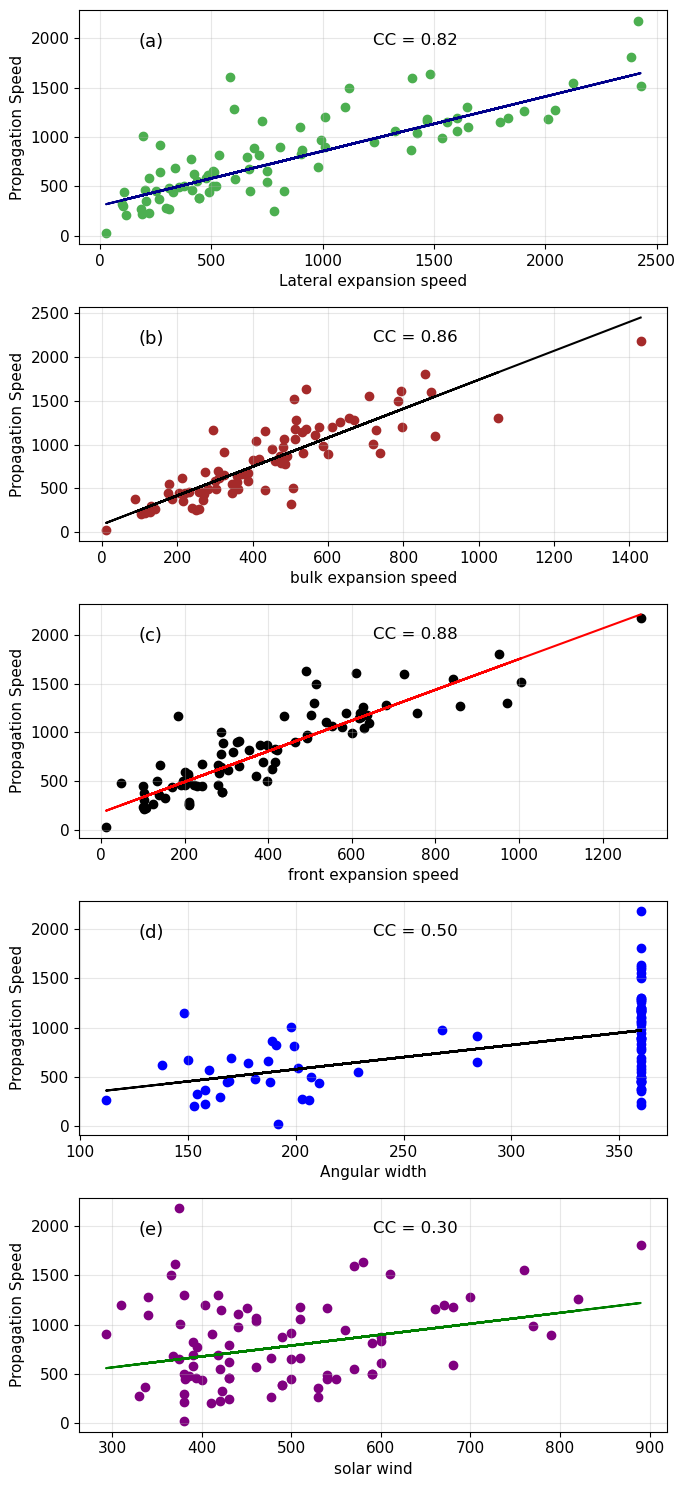

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Generate some sample data
X, y = df[['Vlat']], df['Vp']
# Fit the Huber regression model
model = make_pipeline(StandardScaler(), HuberRegressor())
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)


plt.figure(figsize = (7, 15))

plt.subplot(5,1,1)
plt.scatter(X, y, c='#4CAF50')
plt.plot(X, y_pred, c='darkblue')
plt.xlabel('Lateral expansion speed')
plt.ylabel('Propagation Speed')
plt.legend(frameon=0)
plt.grid(True, alpha =0.3)
plt.annotate(f'CC = 0.82', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.annotate(f'(a)', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=13, ha='left', va='top')




X, y = df[['Vblk']], df['Vp']
# Fit the Huber regression model
model = make_pipeline(StandardScaler(), HuberRegressor())
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)


plt.subplot(5,1,2)
plt.scatter(X, y, c='brown')
plt.plot(X, y_pred, c='black')
plt.xlabel('bulk expansion speed')
plt.ylabel('Propagation Speed')
plt.legend(frameon=0)
plt.grid(True, alpha =0.3)
plt.annotate(f'CC = 0.86', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.annotate(f'(b)', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=13, ha='left', va='top')




X, y = df[['Vfrt']], df['Vp']
# Fit the Huber regression model
model = make_pipeline(StandardScaler(), HuberRegressor())
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)


plt.subplot(5,1,3)
plt.scatter(X, y, c='black')
plt.plot(X, y_pred, c='red')
plt.xlabel('front expansion speed')
plt.ylabel('Propagation Speed')
plt.legend(frameon=0)
plt.grid(True, alpha =0.3)
plt.annotate(f'CC = 0.88', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.annotate(f'(c)', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=13, ha='left', va='top')




X, y = df[['AW']], df['Vp']
# Fit the Huber regression model
model = make_pipeline(StandardScaler(), HuberRegressor())
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)


plt.subplot(5,1,4)
plt.scatter(X, y, c='blue')
plt.plot(X, y_pred, c='black')
plt.xlabel('Angular width')
plt.ylabel('Propagation Speed')
plt.legend(frameon=0)
plt.grid(True, alpha =0.3)
plt.annotate(f'CC = 0.50', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.annotate(f'(d)', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=13, ha='left', va='top')




X, y = df[['Vsw']], df['Vp']
# Fit the Huber regression model
model = make_pipeline(StandardScaler(), HuberRegressor())
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)


plt.subplot(5,1,5)
plt.scatter(X, y, c='purple')
plt.plot(X, y_pred, c='green')
plt.xlabel('solar wind')
plt.ylabel('Propagation Speed')
plt.legend(frameon=0)
plt.grid(True, alpha =0.3)
plt.annotate(f'CC = 0.30', xy=(0.5, 0.90), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.annotate(f'(e)', xy=(0.1, 0.90), xycoords='axes fraction', fontsize=13, ha='left', va='top')

plt.tight_layout()
plt.show()
